This notebook briefly outlines how to get event parameters from different microlensing alert webpages.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt

#  MOA

In [2]:
def plot_moa_Ibase_tE(year):
    """
    This works for MOA alerts from 2016 through 2022 (current season).
    """
    # Get alerts using beautiful soup.
    url = "http://www.massey.ac.nz/~iabond/moa/alert" + year + "/alert.php"
    response = urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html,"html.parser")

    # Grab columns for tE and Ibase.
    tE = soup.find_all('td')[4::8]
    Ibase = soup.find_all('td')[6::8]

    # Convert them from strings to floats.
    tE_list = [float(ne.evaluate(item.get_text())) for item in tE]
    Ibase_list = [float(ne.evaluate(item.get_text())) for item in Ibase]

    # Now, grab the classification column.
    # And only keep things labeled "microlensing".
    cat = soup.find_all('td')[7::8]
    cat_list = [item.get_text() for item in cat]
    ml_idx = [i for i,x in enumerate(cat_list) if x=='microlensing']
    ot_idx = [i for i,x in enumerate(cat_list) if x!='microlensing']
    tE_list_ml = [tE_list[i] for i in ml_idx]
    Ibase_list_ml = [Ibase_list[i] for i in ml_idx]
    tE_list_ot = [tE_list[i] for i in ot_idx]
    Ibase_list_ot = [Ibase_list[i] for i in ot_idx]

    # Plot tE vs Ibase, for microlensing and non-microlensing events.
    plt.plot(tE_list_ml, Ibase_list_ml, '.', alpha=0.5, label='ML')
    plt.plot(tE_list_ot, Ibase_list_ot, '.', alpha=0.5, label='Other')
    plt.xlabel('tE')
    plt.xscale('log')
    plt.ylabel('Ibase')
    plt.title('MOA alerts ({0})'.format(year))
    plt.legend()
    plt.ylim(-5, 30)
    plt.show()

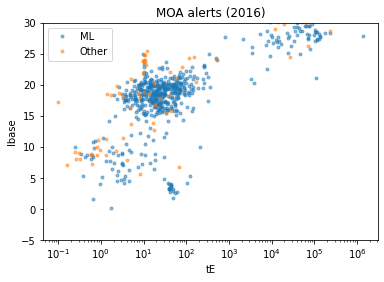

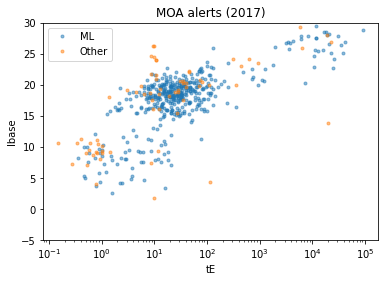

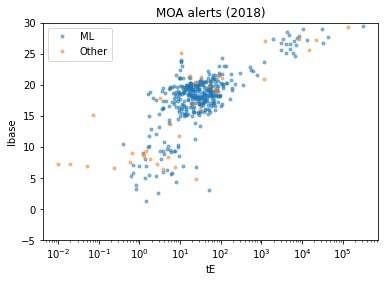

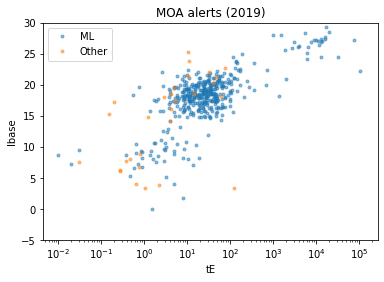

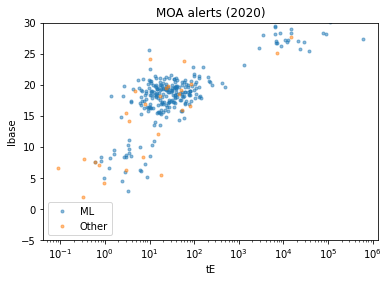

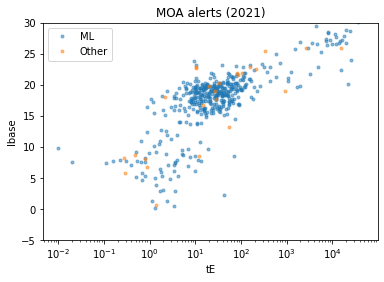

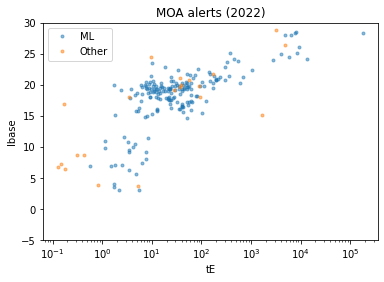

In [3]:
for year in np.arange(2016, 2023, 1):
    plot_moa_Ibase_tE(str(year))

# OGLE

In [4]:
def ogle_str_to_float(item):
    try:
        return float(ne.evaluate(item.contents[0].replace(u'\n', '')))
    except:
        return
    
def plot_ogle_Ibase_tE(year):
    """
    This works for OGLE-IV alerts (2011 through 2019 seasons).
    2019 is the last alerted season before COVID shut OGLE down.
    Rumor has it that OGLE is *supposed* to come back online June 2022 though.
    """
    # Get alerts using beautiful soup.
    url = "https://ogle.astrouw.edu.pl/ogle4/ews/" + year + "/ews.html"
    response = urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html,"html.parser")

    # Grab columns for tE and Ibase.
    tE = soup.find_all('td')[8::15] 
    Ibase = soup.find_all('td')[13::15]

    # Convert them from strings to floats.
    tE_list = [ogle_str_to_float(item) for item in tE]
    Ibase_list = [ogle_str_to_float(item) for item in Ibase]
    
#     Isrc = soup.find_all('td')[14::15]
#     Dmag = soup.find_all('td')[11::15] 
    
#     Isrc_list = [float(ne.evaluate(item.contents[0].replace(u'\n', ''))) for item in Isrc]
#     Dmag_list = [float(ne.evaluate(item.contents[0].replace(u'\n', ''))) for item in Dmag]

    # Plot tE vs Ibase.
    plt.plot(tE_list, Ibase_list, '.', alpha=0.5)
    plt.xlabel('tE')
    plt.xscale('log')
    plt.ylabel('Ibase')
    plt.title('OGLE alerts ({0})'.format(year))
    plt.ylim(12.5, 21.5)
    plt.show()

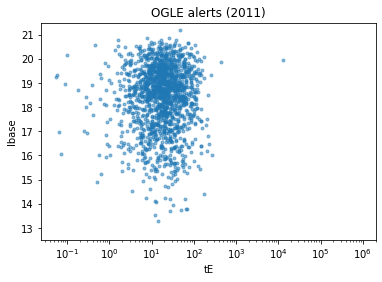

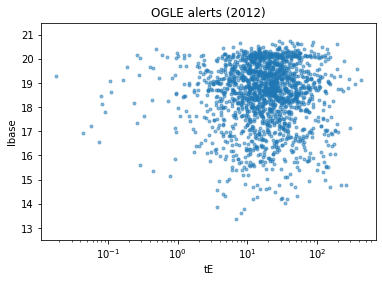

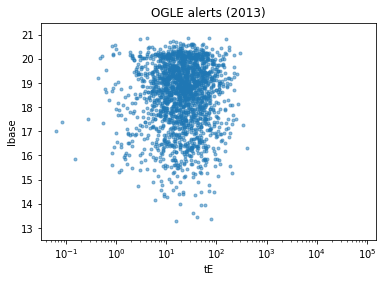

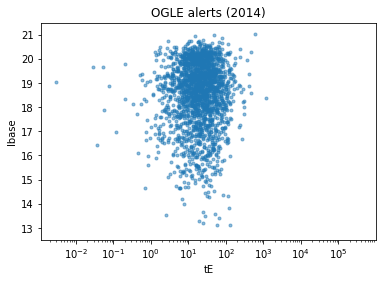

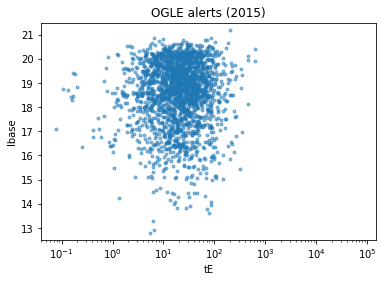

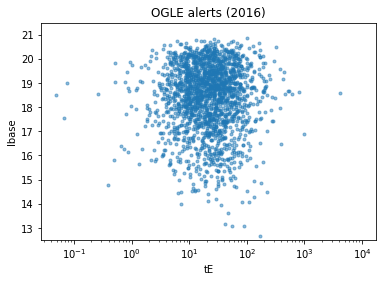

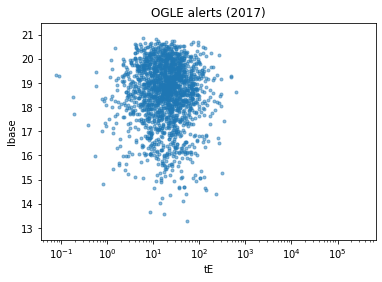

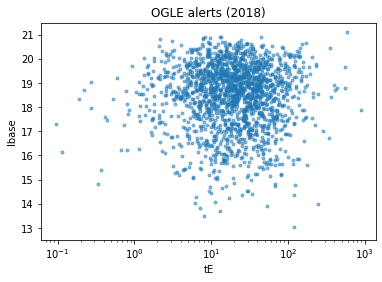

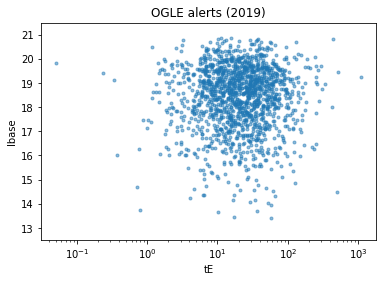

In [5]:
for year in np.arange(2011, 2020, 1):
    plot_ogle_Ibase_tE(str(year))

# KMTNet
FIXME: For KMTNet, add a classification thing like MOA has

In [6]:
# 2 classifications: 2021, 2019, 2018
# 1 classification: 2022, 2020, 2017, 2016
# 2015 didn't have all the info.

def kmtnet_str_to_float(item):
    try:
        return float(ne.evaluate(item.get_text().replace(u'\xa0', u'')))
    except:
        return

def plot_kmtnet_Ibase_tE(year):   
    url = "https://kmtnet.kasi.re.kr/~ulens/event/" + year + "/"
    response = urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html,"html.parser")

    if year in ['2022', '2020', '2017', '2016']:
        tE = soup.find_all('td')[7::15][1:]
        Ibase = soup.find_all('td')[10::15][1:]
    elif year in ['2021', '2019', '2018']:
        tE = soup.find_all('td')[8::16][1:]
        Ibase = soup.find_all('td')[11::16][1:]
    else:
        raise Exception('Not a valid year')

    tE_list = [kmtnet_str_to_float(item) for item in tE]
    Ibase_list = [kmtnet_str_to_float(item) for item in Ibase]

    plt.plot(tE_list, Ibase_list, '.', alpha=0.5)
    plt.xlabel('tE')
    plt.xscale('log')
    plt.ylabel('Ibase')
    plt.title('KMTNet alerts ({0})'.format(year))
    plt.ylim(12.5, 20.5)
    plt.show()

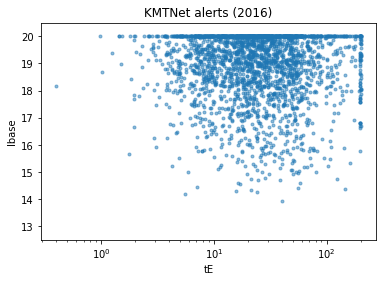

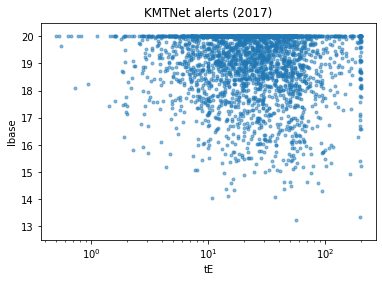

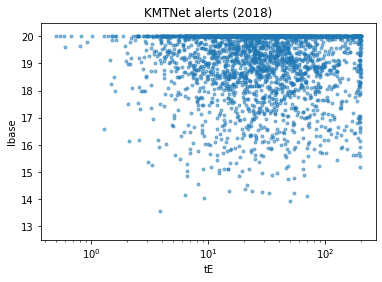

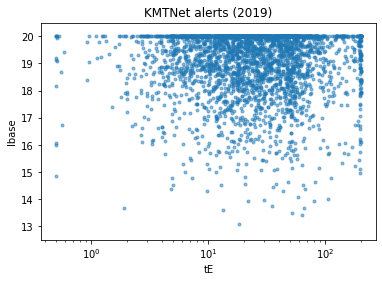

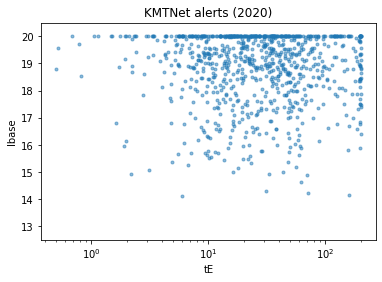

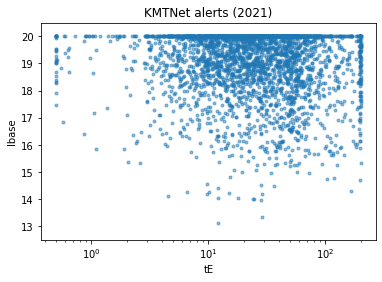

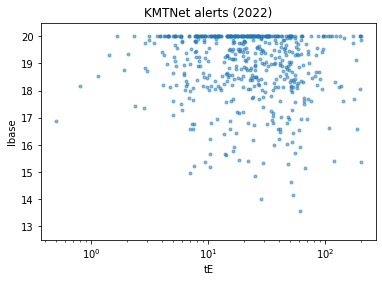

In [7]:
for year in np.arange(2016, 2023, 1):
    plot_kmtnet_Ibase_tE(str(year))